# Assignment 10

## Submit your .ipynb file to Gradescope by Thursday, December 4th **by 10pm**

##### Import necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

1. Converting long to wide format

<font size = "3">

- Load in the data from "daily.csv". This contains the stock prices for Microsoft and Coca-Cola from 1997-2012.

- We are only interested in 3 columns: "symbol", "date", and "adjusted". Create a new DataFrame which contains only these 3 columns.

- Convert the date column to datetime format. I.e. replace the initial "date" column containing strings with one with datetime64 dtype.

- There are two unique values in the "symbol" column, which are the ticker/stock symbols for each company. They correspond to MSFT = Microsoft, and KO = Coca-Cola.

- Using ``pd.pivot`` create a new DataFrame by converting to wide format. Then reset the index, so that "date" is a proper column. Then display/print the DataFrame. The final DataFrame should look something like this:

|  | date | KO | MSFT |
| --- | --- | --- | --- |
| 0 | 1997-01-02 | 12.27 | 6.23 |
| 1 | 1997-01-03 | 12.56 | 6.46 |
| 2 | 1997-01-06 | 12.44 | 6.44 |
| ⋮ | ⋮ | ⋮ | ⋮ |

In [2]:
# SOLUTION

df_all = pd.read_csv("data/daily.csv")

df = df_all[["symbol", "date", "adjusted"]].copy()

df['date'] = pd.to_datetime(df['date'])

df_wide = pd.pivot(df,
                    index = "date",
                    columns = "symbol",
                    values = "adjusted").reset_index()
display(df_wide)

symbol,date,KO,MSFT
0,1997-01-02,12.272199,6.232640
1,1997-01-03,12.567904,6.461713
2,1997-01-06,12.449619,6.442623
3,1997-01-07,12.863628,6.490343
4,1997-01-08,12.627052,6.366264
...,...,...,...
4020,2012-12-21,24.779921,22.105970
4021,2012-12-24,24.672443,21.791899
4022,2012-12-26,24.464212,21.630840
4023,2012-12-27,24.464212,21.711372


<font size = "5">

2. Grouping by time

<font size = "3">

- Continue using the DataFrame in wide format you created in Problem 1.

- Use ``pd.Grouper`` to create a ``TimeGrouper`` object, which will allow you to group the "date" column by **weeks**

- Group the date column by weeks and aggregate the weekly average values for both Coca-Cola and Microsoft.

- On a single figure, plot date vs. adjusted price for both companies. Label the axes and add a figure to the plot. In addition, your plot should contain a legend with two items: "Coca-Cola" and "Microsoft". The legend should have these names exactly as written. The order in which they appear doesn't matter, as long as they correspond to the correct line.


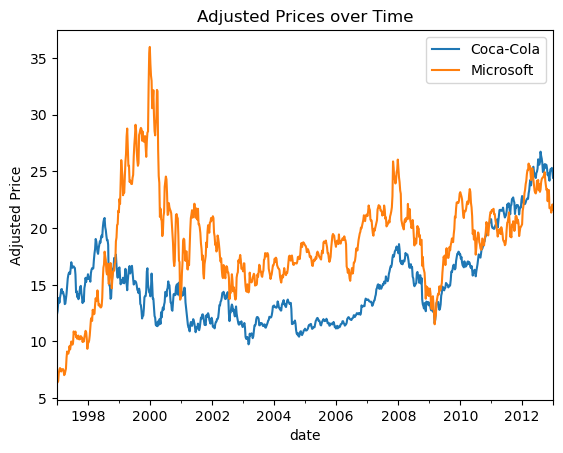

In [3]:
# SOLUTION

week_config = pd.Grouper(key = 'date', freq = 'W')

weeklydata = (df_wide.groupby(week_config).
            agg(KO_weekly = ("KO", "mean"), 
            MSFT_weekly = ("MSFT", "mean")))


ax = weeklydata.plot()
ax.legend(["Coca-Cola", "Microsoft"])
ax.set_ylabel("Adjusted Price")
plt.title("Adjusted Prices over Time")
plt.show()

<font size = "5">

3. Converting wide to long format

<font size = "3">

- Use ``pd.melt`` to convert the DataFrame you created in Problem 1 back to long format.

- The variable name column should be "ticker_symbol", while the value name column should be "adjusted_price".

- Use ``.set_index`` to make "date" the index column.

- Display/print the DataFrame. The final DataFrame should look something like this:

| date | ticker_symbol | adjusted_price |
| --- | --- | --- |
| 1997-01-02 | KO/MSFT | (price value) |
| 1997-01-03 | KO/MSFT | (price value) |
| 1997-01-06 | KO/MSFT | (price value) |
| ⋮ | ⋮ | ⋮ |

- (The exact ordering of ticker_symbol and the first 3 price values can vary, depending on the exact ordering of arguments you use in ``pd.melt``)

In [4]:
# SOLUTION

df_long = pd.melt(df_wide,
                  var_name = "ticker_symbol",
                  value_name = "adjusted_price",
                  id_vars = "date",
                  value_vars = ["MSFT", "KO"]
                   ).set_index("date")

display(df_long)

,ticker_symbol,adjusted_price
date,,
1997-01-02,MSFT,6.232640
1997-01-03,MSFT,6.461713
1997-01-06,MSFT,6.442623
1997-01-07,MSFT,6.490343
1997-01-08,MSFT,6.366264
...,...,...
2012-12-21,KO,24.779921
2012-12-24,KO,24.672443
2012-12-26,KO,24.464212


In [5]:
# SOLUTION (other ordering)

df_long = pd.melt(df_wide,
                  var_name = "ticker_symbol",
                  value_name = "adjusted_price",
                  id_vars = "date",
                  value_vars = ["KO", "MSFT"]
                   ).set_index("date")

display(df_long)

,ticker_symbol,adjusted_price
date,,
1997-01-02,KO,12.272199
1997-01-03,KO,12.567904
1997-01-06,KO,12.449619
1997-01-07,KO,12.863628
1997-01-08,KO,12.627052
...,...,...
2012-12-21,MSFT,22.105970
2012-12-24,MSFT,21.791899
2012-12-26,MSFT,21.630840


<font size = "5">

4. Search for strings 

<font size = "3">

- Load in the from "Datafiniti_Hotel_Reviews.csv" and save it to a DataFrame named ``hotels``

- The "name" column contains the name of each hotel for which a customer review is available. The names are very specific, for example there is "Hampton Inn and Suites Napa" as well as "Hampton Inn Atlanta-Perimeter Center".

- Using ``.str.contains``, create a Boolean Pandas Series where each entry is "True" if the "name" of the hotel contains the string "Hampton Inn".

- Using this Boolean Series, create a new DataFrame called ``hampton`` which contains all rows from the original DataFrame which have the string "Hampton Inn" in the hotel name.

In [6]:
# SOLUTION

hotels = pd.read_csv("data/Datafiniti_Hotel_Reviews.csv")

bool_hampton = hotels['name'].str.contains('Hampton Inn')

hampton = hotels[bool_hampton]
display(hampton)

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
9,AVwePiAX_7pvs4fzBSAl,2016-03-23T04:22:41Z,2018-09-10T21:06:09Z,315 SE Olympia Dr,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Vancouver,US,us/wa/vancouver/315seolympiadr/1818657156,45.619212,...,2016-04-19T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6082...,"In my line of work, I use meeting space in hot...",Amazing employees and facilities,Portland,NaN,KristyWM,https://www.yellowpages.com/vancouver-wa/mip/h...,http://hamptoninn3.hilton.com/en/hotels/washin...
10,AVwePiAX_7pvs4fzBSAl,2016-03-23T04:22:41Z,2018-09-10T21:06:09Z,315 SE Olympia Dr,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Vancouver,US,us/wa/vancouver/315seolympiadr/1818657156,45.619212,...,2016-05-13T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6082...,The staff is very friendly and helpful. The ro...,I loved our stay here,NaN,NaN,B M,https://www.yellowpages.com/vancouver-wa/mip/h...,http://hamptoninn3.hilton.com/en/hotels/washin...
11,AVwePiAX_7pvs4fzBSAl,2016-03-23T04:22:41Z,2018-09-10T21:06:09Z,315 SE Olympia Dr,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Vancouver,US,us/wa/vancouver/315seolympiadr/1818657156,45.619212,...,2016-04-19T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6082...,"Very friendly staff, great free breakfast item...",Hampton Inn - Vancouver WA,Antioch,NaN,Cathleen S,https://www.yellowpages.com/vancouver-wa/mip/h...,http://hamptoninn3.hilton.com/en/hotels/washin...
12,AVwePiAX_7pvs4fzBSAl,2016-03-23T04:22:41Z,2018-09-10T21:06:09Z,315 SE Olympia Dr,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Vancouver,US,us/wa/vancouver/315seolympiadr/1818657156,45.619212,...,"2016-03-20T00:00:00Z,2016-04-19T00:00:00Z",5.0,http://www.tripadvisor.com/Hotel_Review-g60820...,Upon arriving I see modern yet elegant decor w...,Perfection,Portland,NaN,1fiesty,https://www.yellowpages.com/vancouver-wa/mip/h...,http://hamptoninn3.hilton.com/en/hotels/washin...
13,AVwePiAX_7pvs4fzBSAl,2016-03-23T04:22:41Z,2018-09-10T21:06:09Z,315 SE Olympia Dr,"Hotels,Hotels and motels,Hotel and motel reser...",Accommodation & Food Services,Vancouver,US,us/wa/vancouver/315seolympiadr/1818657156,45.619212,...,2016-07-28T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g6082...,This is a nice hotel with great staff. I have ...,Good hotel. Worth checking out.,Port Orchard,WA,810michellemm,https://www.yellowpages.com/vancouver-wa/mip/h...,http://hamptoninn3.hilton.com/en/hotels/washin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,AVweKSfvIN2L1WUf2hec,2015-11-06T12:12:56Z,2018-01-03T16:00:56Z,31720 Gateway Center Blvd S,"Hotels and motels,Hotel,Travel and Tourism",Accommodation & Food Services,Federal Way,US,us/wa/federalway/31720gatewaycenterblvds/-1473...,47.317158,...,"2016-04-19T00:00:00Z,2016-03-20T00:00:00Z",5.0,https://www.tripadvisor.com/Hotel_Review-g5847...,If I can I stay here when I come to town. Pric...,A great option among area choices,Kennewick,WA,NifT33,http://www.yellowbook.com/profile/hampton-inn-...,http://hampton.com
9927,AVweKSfvIN2L1WUf2hec,2015-11-06T12:12:56Z,2018-01-03T16:00:56Z,31720 Gateway Center Blvd S,"Hotels and motels,Hotel,Travel and Tourism",Accommodation & Food Services,Federal Way,US,us/wa/federalway/31720gatewaycenterblvds/-1473...,47.317158,...,2016-07-28T00:00:00Z,5.0,https://www.tripadvisor.com/Hotel_Review-g5847...,Great service and food. No complaints they wer...,Family visit,Santa Rosa,CA,N3298TUsimonef,http://www.yellowbook.com/profile/hampton-inn-...,http://hampton.com
9928,AVweKSfvIN2L1WUf2hec,2015-11-06T12:12:56Z,2018-01-03T16:00:56Z,31720 Gateway Center Blvd S,"Ho

<font size = "5">

5. Searching with wild cards 

<font size = "3">

Use the DataFrame ``hampton`` you created in Problem 4.

The text reviews can be found in the "reviews.text" column of the DataFrame. Use ``str.findall`` to return a Pandas Series with all occurences of strings containing all consecutive characters of any kind immediately followed by the string "nice hotel". 

To make this more clear, consider the following string:

- "This was a really nice hotel. Very nice. Love this hotel"

Then the return value of ``str.findall`` should have the sub-string "This was a really nice hotel" as its corresponding element.

Using the ``str.len`` method, create a new Series where all the empty "non-matches" are omitted, leaving only the phrases that matched the search term above.

Repeat this process for the phrase "Nice hotel" with a capital "N". (Again, it should include all consecutive characters before this phrase). 

Finally, repeat the process one more time, but in such a way that **both** "nice hotel" and "Nice hotel" are included in the match (again with all consecutive characters preceding them included).

To be clear, your code should create a total of **six** Pandas series, 3 that include empty "non-matches" and 3 where these are excluded.

In [7]:
# SOLUTION

# first pair
example1 = hampton["reviews.text"].str.findall(".*nice hotel")
nice_hotel = example1[example1.str.len() > 0]
display(nice_hotel)

# second pair
example2 = hampton["reviews.text"].str.findall(".*Nice hotel")
Nice_hotel = example2[example2.str.len() > 0]
display(Nice_hotel)


# third pair
example3 = hampton["reviews.text"].str.findall(".*[nN]ice hotel", )
nNice_hotel = example3[example3.str.len() > 0]
display(nNice_hotel)


13                                 [This is a nice hotel]
1249                                  [Really nice hotel]
3934    [This is a nice hotel. I like Hampton Inn's fr...
4446                       [Overall this is a nice hotel]
4594                                    [Very nice hotel]
5983    [I normally stay at the HIE here in Orangeburg...
6881                          [This is a very nice hotel]
7696    [We stayed 2 nights while visiting Matha's vin...
8493                                    [Very nice hotel]
8997                                    [Very nice hotel]
9815                         [This was a very nice hotel]
Name: reviews.text, dtype: object

4071    [Nice hotel]
Name: reviews.text, dtype: object

13                                 [This is a nice hotel]
1249                                  [Really nice hotel]
3934    [This is a nice hotel. I like Hampton Inn's fr...
4071                                         [Nice hotel]
4446                       [Overall this is a nice hotel]
4594                                    [Very nice hotel]
5983    [I normally stay at the HIE here in Orangeburg...
6881                          [This is a very nice hotel]
7696    [We stayed 2 nights while visiting Matha's vin...
8493                                    [Very nice hotel]
8997                                    [Very nice hotel]
9815                         [This was a very nice hotel]
Name: reviews.text, dtype: object